In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
import os
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder

# Mount Google Drive
drive.mount('/content/drive')

# change directory
os.chdir("/content/drive/MyDrive/INST414/Sprints/Model")


Mounted at /content/drive


In [2]:
#Load CSV
sm_metrics = pd.read_csv("conversion_data.csv")

In [3]:
display(sm_metrics)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [4]:
#check for missing values
sm_metrics.isnull().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


In [5]:
#Check if fb_campaign_id was removed
sm_metrics.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
#Rename column xyz_campaign_id to campaign_id
sm_metrics.rename(columns={
    "xyz_campaign_id": "campaign_id",
}, inplace=True)

In [7]:
sm_metrics['campaign_id'].value_counts()

,count
campaign_id,
1178,625
936,464
916,54


In [8]:
#Simplifying campaign ID names
sm_metrics['campaign_id'] = sm_metrics['campaign_id'].replace(
    {916: 'Campaign_1',936:'Campaign_2',1178:'Campaign_3'})

In [9]:
sm_metrics['campaign_id'].value_counts()

,count
campaign_id,
Campaign_3,625
Campaign_2,464
Campaign_1,54


In [10]:
#Check if xyz_campaign_id was renamed
sm_metrics.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


<ipython-input-11-de0d3ca61f86>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='interest', data=sm_metrics, palette="coolwarm")


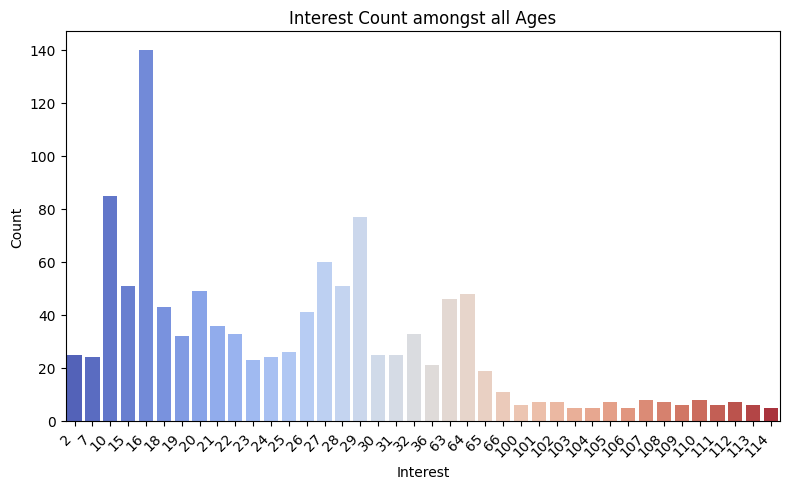

In [11]:
#Data visualization of interest by age
#Generate bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='interest', data=sm_metrics, palette="coolwarm")
plt.xlabel("Interest")
plt.ylabel("Count")
plt.title("Interest Count amongst all Ages")

# Save as PNG
# plt.savefig("barchart.png", dpi=300, bbox_inches='tight')

# Show in Notebook
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Save as PNG
plt.savefig("InterestCountByAge.png", dpi=300, bbox_inches='tight')
plt.show()




In [33]:
# Data visualiztion of Amount of impressions by amount spent when influencer/celebrity is involved
fig = px.scatter(sm_metrics, x="Spent", y="Impressions", color="interest", hover_data=['ad_id', 'interest','Spent','campaign_id'], title="Num of Impressions based on Amt Spent on Ad",
                 labels={"ad_id": "ad_id", "interest": "interest"})

# Center the title
fig.update_layout(title_x=0.5)
# Save as html
pio.write_html(fig, file="ImpressionByAdSpend.html", auto_open=True)
fig.show()


<ipython-input-13-d4335a99e530>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




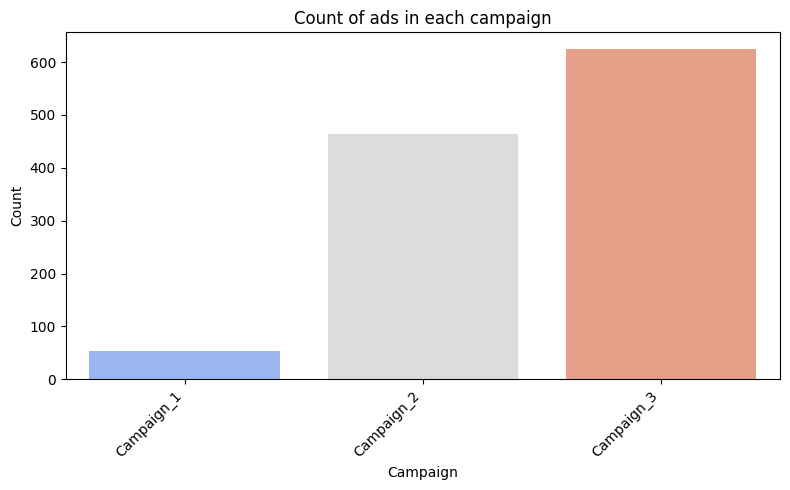

In [13]:
#Data visualization of counts of ad in each campaign
#Generate bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='campaign_id', data=sm_metrics, palette="coolwarm")
plt.xlabel("Campaign")
plt.ylabel("Count")
plt.title("Count of ads in each campaign")

# Save as PNG
plt.savefig("CountOfAdsInCampaign.png", dpi=300, bbox_inches='tight')

# Show in Notebook
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

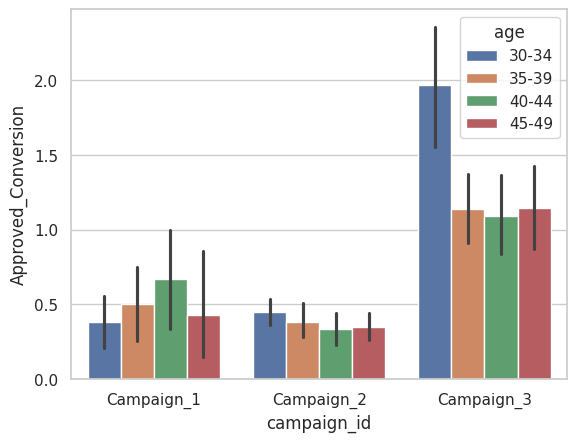

In [14]:
#Age distribution amongst each campaign
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=sm_metrics["campaign_id"], y=sm_metrics["Approved_Conversion"], hue=sm_metrics["age"], data=tips)
# Save as PNG
plt.savefig("AgeDistribuitionOfCampaigns.png", dpi=300, bbox_inches='tight')

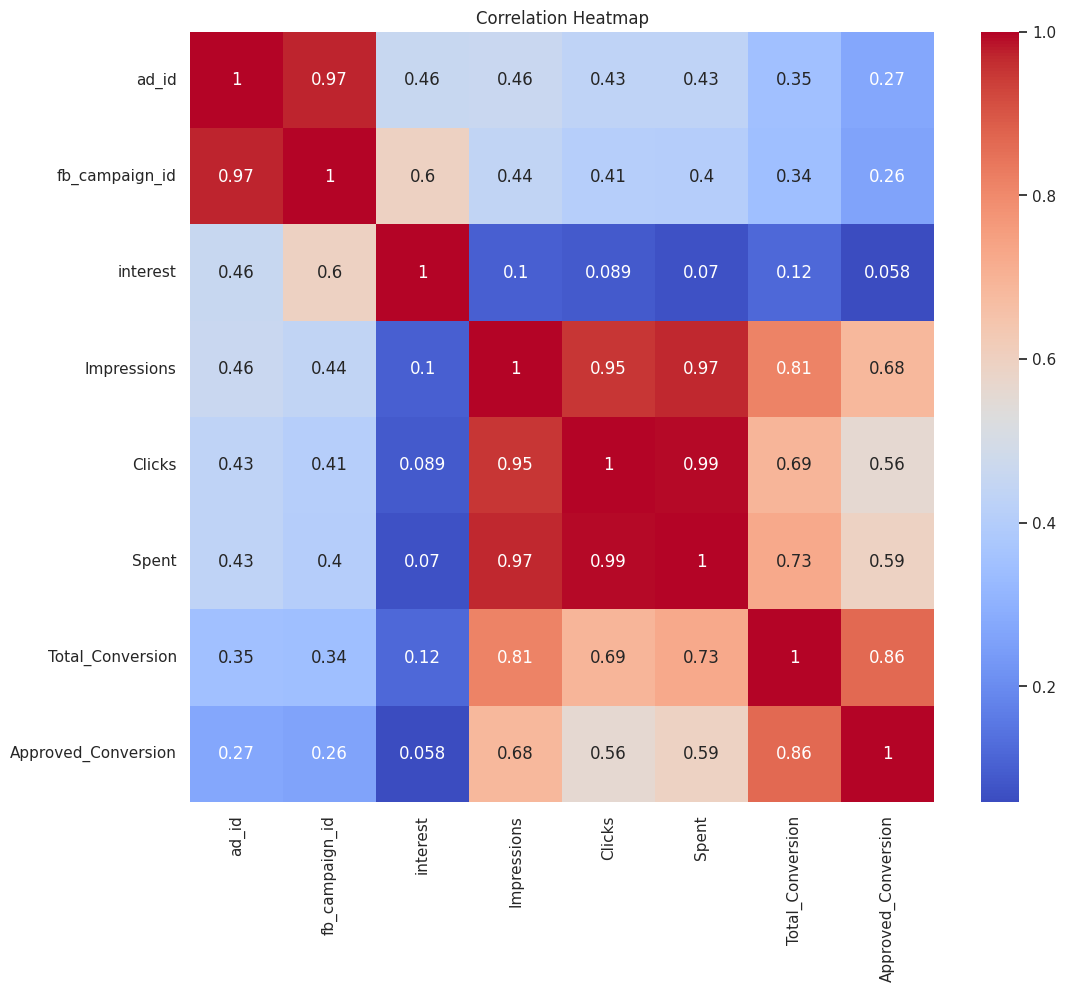

In [15]:
#Perform correlation analysis

df_numeric = sm_metrics.select_dtypes(include=['number'])
plt.figure(figsize=(12,10))
# Plot correlation heatmap
sns.heatmap(df_numeric.corr(), annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
# Save as PNG
plt.savefig("CorrelationHeatMap.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
sm_metrics.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [17]:
#Feature engineering
# encoding gender
encoder=LabelEncoder()
encoder.fit(sm_metrics["gender"])
sm_metrics["gender"]=encoder.transform(sm_metrics["gender"])
sm_metrics.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,1,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,1,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,1,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,1,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,1,28,4133,1,1.29,1,1


In [18]:
#Feature engineering
# encoding age
encoder=LabelEncoder()
encoder.fit(sm_metrics["age"])
sm_metrics["age"]=encoder.transform(sm_metrics["age"])
sm_metrics.head()

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,0,1,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,0,1,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,0,1,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,0,1,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,0,1,28,4133,1,1.29,1,1


In [19]:
# replacing campaign_id with actual id's for modeling
sm_metrics["campaign_id"].replace({"Campaign_1":916 ,"Campaign_2":936 ,"Campaign_3":1178}, inplace=True)

<ipython-input-19-237a191a1ebf>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-19-237a191a1ebf>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [20]:
#Feature engineering dropping approved conversion and total conversion
X=np.array(sm_metrics.drop(labels=["Approved_Conversion","ad_id", "campaign_id","fb_campaign_id" ], axis=1))
y=np.array(sm_metrics["Approved_Conversion"])

In [21]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [22]:
#Model creation
y=y.reshape(len(y),1)

In [23]:
#feature scaling
sc_x= StandardScaler()
x = sc_x.fit_transform(X)

In [24]:
#Splitting data into test and trainset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
#Using random forest regressor to predict total conversion
sm_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
sm_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
#Predicting Total Conversion in test_set
y_pred=sm_model.predict(x_test)
y_pred=np.round(y_pred)

In [27]:
# Apply 10-fold cross-validation
mae_scores = cross_val_score(sm_model, x, y.ravel(), cv=10, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores #change to positive values.
avg_mae = mae_scores.mean()
std_mae = mae_scores.std()

# Apply 10-fold cross-validation for R2
r2_scores = cross_val_score(sm_model, x, y.ravel(), cv=10, scoring='r2')
avg_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print(f"Average MAE (10-fold CV): {avg_mae}")
print(f"Standard Deviation of MAE (10-fold CV): {std_mae}")
print(f"Average R2 (10-fold CV): {avg_r2}")
print(f"Standard Deviation of R2 (10-fold CV): {std_r2}")

Average MAE (10-fold CV): 0.6941830663615561
Standard Deviation of MAE (10-fold CV): 0.17856494646417326
Average R2 (10-fold CV): 0.20819866053495661
Standard Deviation of R2 (10-fold CV): 0.4153350935398154


In [28]:
#Evaluating
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)
print(f"mae:{mae}")
print(f"r2_score:{r2_score}")

mae:0.6550218340611353
r2_score:0.6142272927945722


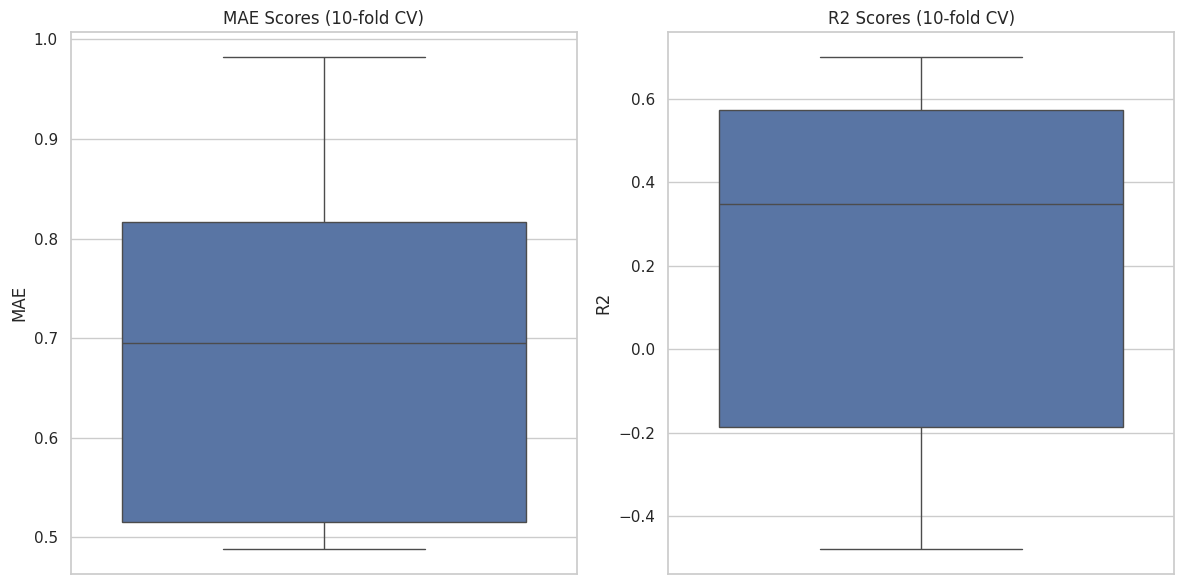

In [29]:
# Performance visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=mae_scores)
plt.title("MAE Scores (10-fold CV)")
plt.ylabel("MAE")

plt.subplot(1, 2, 2)
sns.boxplot(y=r2_scores)
plt.title("R2 Scores (10-fold CV)")
plt.ylabel("R2")

plt.tight_layout()
# Save as PNG
plt.savefig("PerformaceVisualization.png", dpi=300, bbox_inches='tight')
plt.show()


Feature Importance:
Impressions: 0.7883
age: 0.0611
fb_campaign_id: 0.0597
interest: 0.0406
gender: 0.0318
ad_id: 0.0130
campaign_id: 0.0054


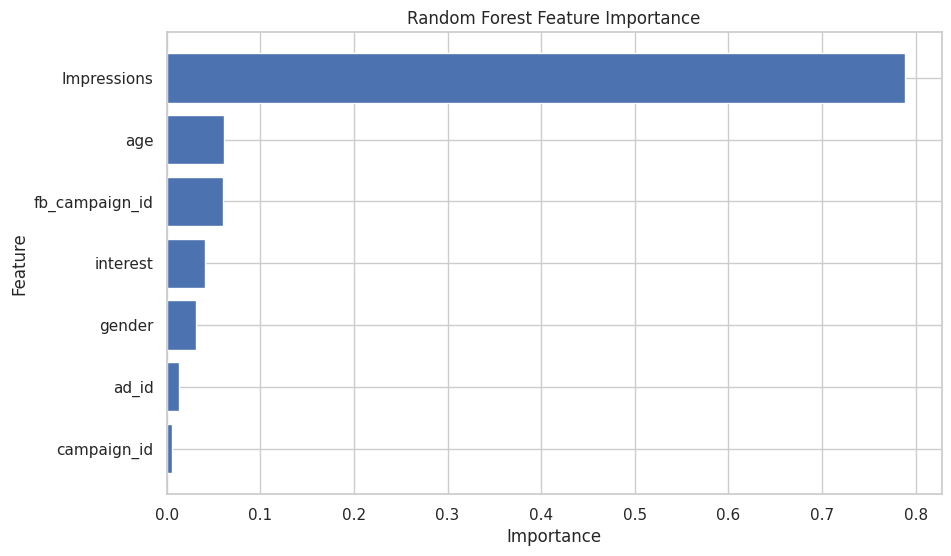

In [30]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_columns = [col for col in sm_metrics.columns if col != "Approved_Conversion"] # Adjust this list as needed
feature_names_np = np.array(feature_columns)

# Convert feature importances to a NumPy array
feature_importances_np = np.array(sm_model.feature_importances_)

# Ensure the number of feature names matches the number of importances
num_features = len(feature_importances_np)
if len(feature_names_np) != num_features:
    print(f"Warning: Number of feature names ({len(feature_names_np)}) does not match the number of feature importances ({num_features}).")

# Create a structured NumPy array to easily sort by importance
feature_importance_dtype = [('feature', 'U100'), ('importance', 'f8')] # Adjust 'U100' as needed
feature_importance_structured = np.empty(num_features, dtype=feature_importance_dtype)
feature_importance_structured['feature'] = feature_names_np[:num_features] # Ensure we don't go out of bounds
feature_importance_structured['importance'] = feature_importances_np

# Sort the structured array by importance in descending order
sorted_feature_importance = np.sort(feature_importance_structured, order='importance')[::-1]

# Print Feature Importance
print("\nFeature Importance:")
for feature in sorted_feature_importance:
    print(f"{feature['feature']}: {feature['importance']:.4f}")

# Visualize feature importance using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance['feature'], sorted_feature_importance['importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
# Save as PNG
plt.savefig("FeatureImportance.png", dpi=300, bbox_inches='tight')
plt.show()

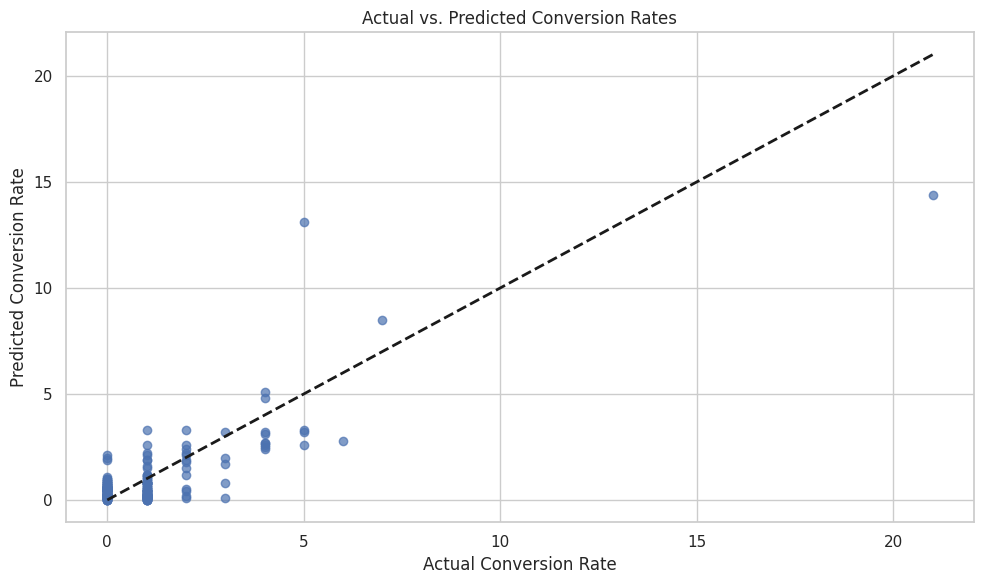

In [31]:
# Make predictions on the test set
y_predicted = sm_model.predict(x_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, alpha=0.7)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Actual vs. Predicted Conversion Rates')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
# Save as PNG
plt.savefig("ActualvsPredictedConversions.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
!jupyter nbconvert --to html "ProgAssignment1.ipynb"

[NbConvertApp] WARNING | pattern 'ProgAssignment1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute